# These are all tentative pa pooooo tapusin ko bukasss hihiiii

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [3]:

# Read the CSV file
file_path = 'data/df_cleaned.csv'
df_cleaned = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_cleaned

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,...,currency,price,usdprice,month,month_sin,month_cos,distance_from_central,climate_season,pandemic_phase,major_holiday_flag
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,...,PHP,15.00,0.3717,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,...,PHP,18.35,0.4548,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,...,PHP,18.00,0.4461,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,...,PHP,16.35,0.4052,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,...,PHP,105.37,2.6114,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123089,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,...,PHP,71.67,1.4949,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,...,PHP,103.33,2.1555,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,...,PHP,114.17,2.3814,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,...,PHP,45.00,0.9387,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0


In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123094 entries, 0 to 123093
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   123094 non-null  object 
 1   admin1                 123094 non-null  object 
 2   admin2                 123094 non-null  object 
 3   market                 123094 non-null  object 
 4   latitude               123094 non-null  float64
 5   longitude              123094 non-null  float64
 6   category               123094 non-null  object 
 7   commodity              123094 non-null  object 
 8   unit                   123094 non-null  object 
 9   priceflag              123094 non-null  object 
 10  pricetype              123094 non-null  object 
 11  currency               123094 non-null  object 
 12  price                  123094 non-null  float64
 13  usdprice               123094 non-null  float64
 14  month                  123094 non-nu

In [5]:
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'date':
['2000-01-15' '2000-02-15' '2000-03-15' '2000-04-15' '2000-05-15'
 '2000-06-15' '2000-07-15' '2000-08-15' '2000-09-15' '2000-10-15'
 '2000-11-15' '2000-12-15' '2001-01-15' '2001-02-15' '2001-03-15'
 '2001-04-15' '2001-05-15' '2001-06-15' '2001-07-15' '2001-08-15'
 '2001-09-15' '2001-10-15' '2001-11-15' '2001-12-15' '2002-01-15'
 '2002-02-15' '2002-03-15' '2002-04-15' '2002-05-15' '2002-06-15'
 '2002-07-15' '2002-08-15' '2002-09-15' '2002-10-15' '2002-11-15'
 '2002-12-15' '2003-01-15' '2003-02-15' '2003-03-15' '2003-04-15'
 '2003-05-15' '2003-06-15' '2003-07-15' '2003-08-15' '2003-09-15'
 '2003-10-15' '2003-11-15' '2003-12-15' '2004-01-15' '2004-02-15'
 '2004-03-15' '2004-04-15' '2004-05-15' '2004-06-15' '2004-07-15'
 '2004-08-15' '2004-09-15' '2004-10-15' '2004-11-15' '2004-12-15'
 '2005-01-15' '2005-02-15' '2005-03-15' '2005-04-15' '2005-05-15'
 '2005-06-15' '2005-07-15' '2005-08-15' '2005-09-15' '2005-10-15'
 '2005-11-15' '2005-12-15' '2006-01-15' '200

# Exploratory Data Analysis

In [7]:
# Summary Statistics
df_cleaned.describe()

,latitude,longitude,price,usdprice,month,month_sin,month_cos,distance_from_central,major_holiday_flag
count,123094.000000,123094.000000,123094.000000,123094.000000,123094.000000,1.230940e+05,1.230940e+05,123094.000000,123094.000000
mean,11.716218,122.868931,117.433788,2.240172,6.737997,-5.946982e-02,-5.082329e-03,497.332290,0.170374
std,3.616606,1.917110,112.090134,2.097432,3.417712,6.916043e-01,7.198119e-01,320.423325,0.375962
min,5.029099,118.735278,3.480000,0.070200,1.000000,-1.000000e+00,-1.000000e+00,0.560898,0.000000
25%,8.482192,121.086142,40.980000,0.802000,4.000000,-8.660254e-01,-8.660254e-01,210.653732,0.000000
50%,11.580280,122.590380,81.145000,1.569300,7.000000,-2.449294e-16,-1.836970e-16,466.572654,0.000000
75%,14.674085,124.651647,158.330000,3.044475,10.000000,5.000000e-01,8.660254e-01,791.171964,0.000000
max,18.194082,126.207645,1216.670000,21.062900,12.000000,1.000000e+00,1.000000e+00,1072.393800,1.000000


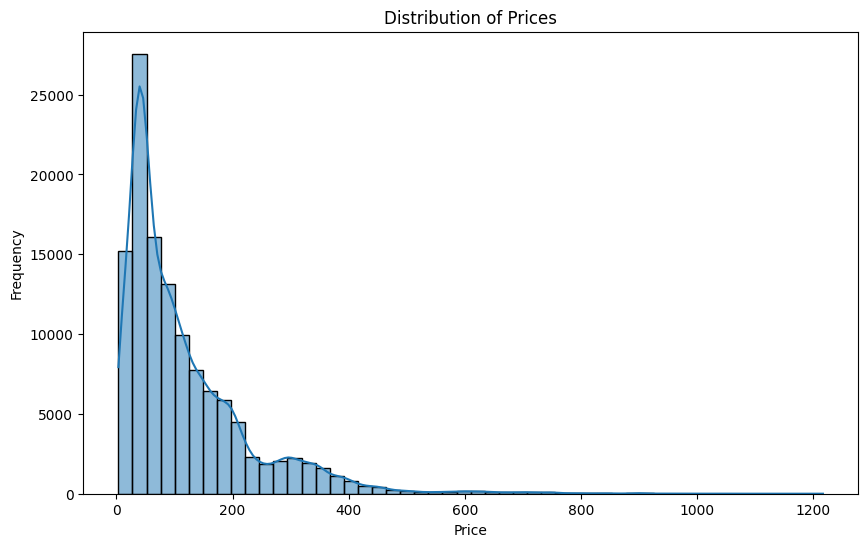

In [10]:
import seaborn as sns

# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

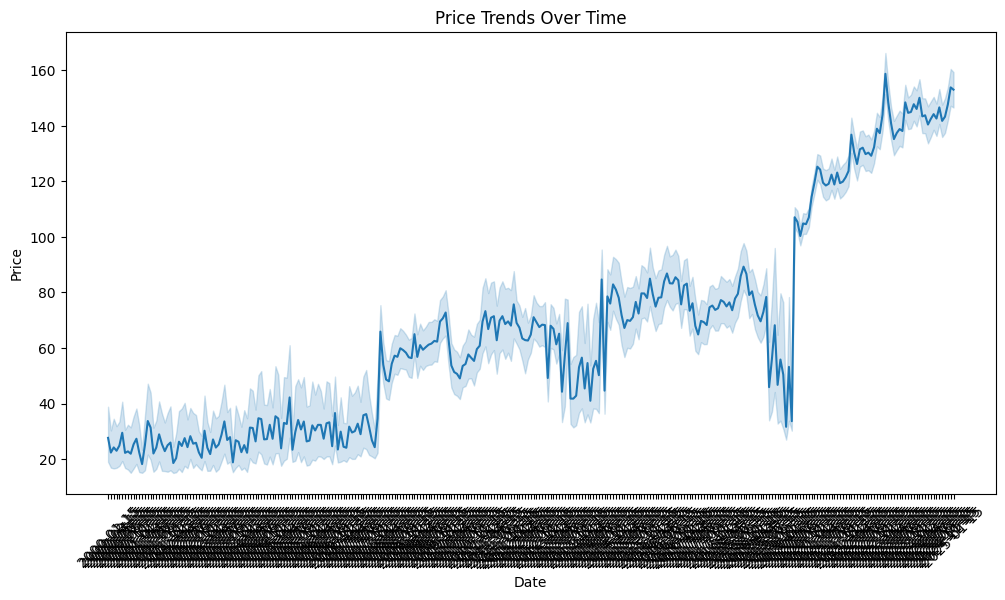

In [11]:
# Price Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='price')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

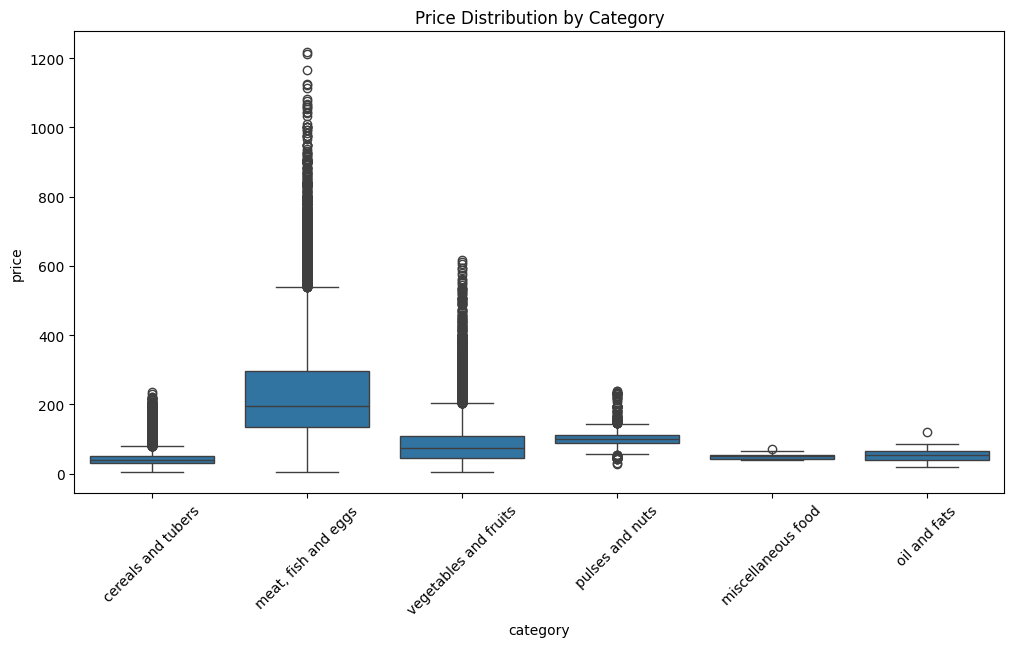

In [12]:
# Boxplot of Prices by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='category', y='price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

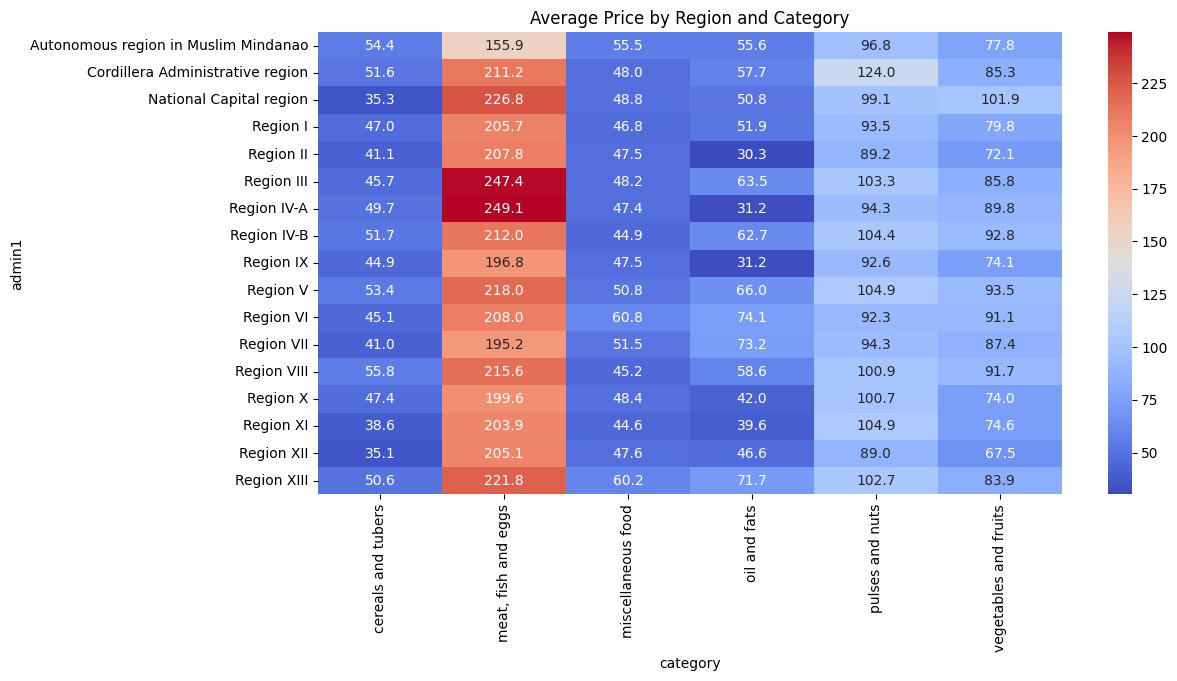

In [13]:
# Heatmap of Prices by Region
plt.figure(figsize=(12, 6))
df_pivot = df_cleaned.pivot_table(index='admin1', columns='category', values='price', aggfunc='mean')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Price by Region and Category')
plt.show()

In [ ]:
# # Geospatial Visualization of Markets
# m = folium.Map(location=[12.8797, 121.7740], zoom_start=6)
# for _, row in df_cleaned.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=3,
#         popup=f"{row['market']}: {row['price']} PHP",
#         color='blue',
#         fill=True,
#         fill_color='blue'
#     ).add_to(m)
# m.save("markets_map.html")

NameError: name 'folium' is not defined

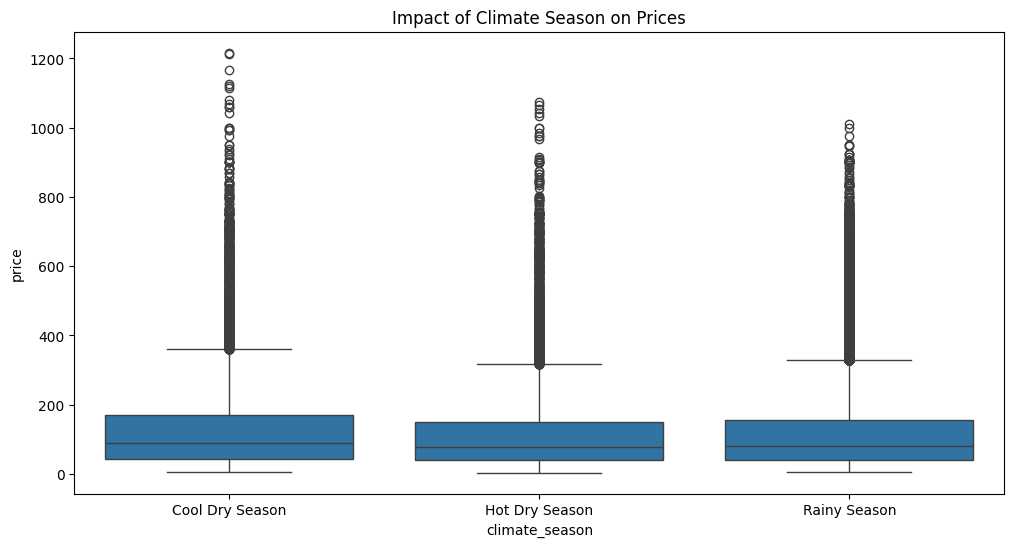

In [15]:
# Impact of Climate Season on Prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='climate_season', y='price')
plt.title('Impact of Climate Season on Prices')
plt.show()

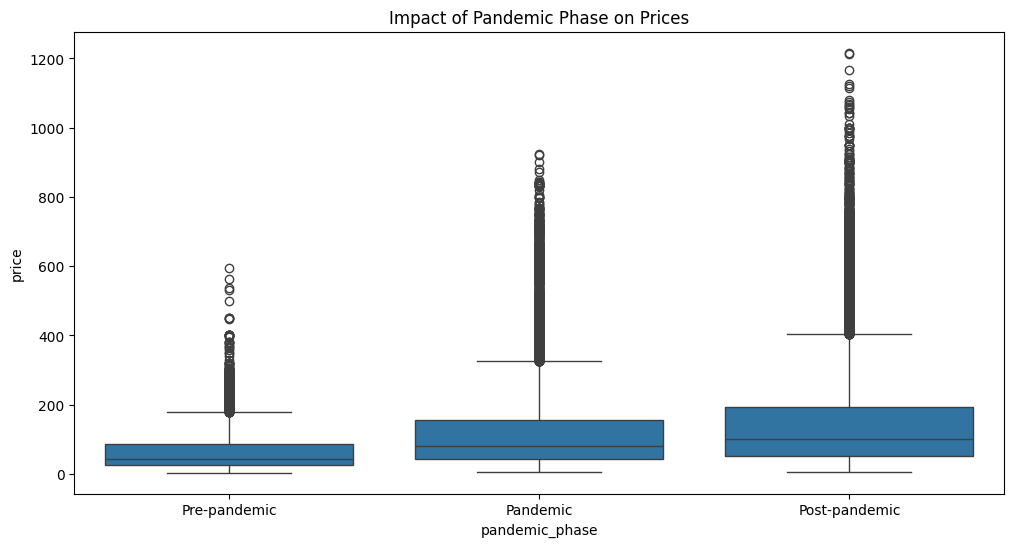

In [16]:
# Impact of Pandemic Phase on Prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='pandemic_phase', y='price')
plt.title('Impact of Pandemic Phase on Prices')
plt.show()

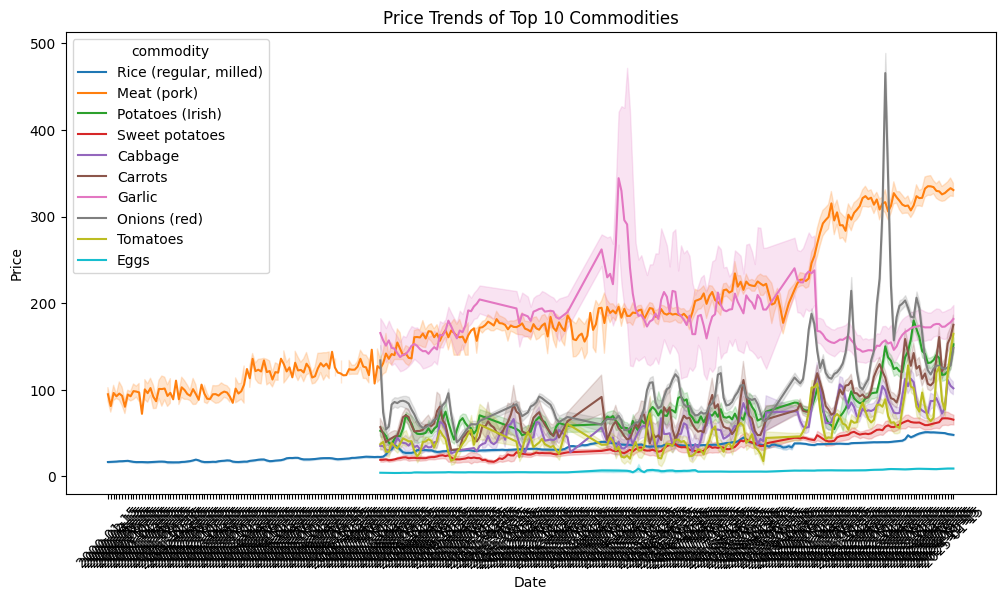

In [17]:
# Price Trends by Commodity
plt.figure(figsize=(12, 6))
top_commodities = df_cleaned['commodity'].value_counts().index[:10]
df_top = df_cleaned[df_cleaned['commodity'].isin(top_commodities)]
sns.lineplot(data=df_top, x='date', y='price', hue='commodity')
plt.title('Price Trends of Top 10 Commodities')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()